**PIA-Entrenamiento de una Red Neuronal Convolucional**

Grupo:007  
Hora:N1  
Frecuencia:Lunes-Miercoles-Viernes

Equipo 1

**Integrantes**

Monserrat Marroquin Montes 1897868 IMTC

Alexa Estefania Navarro Mata 1918022 IMTC

Francisco Jesus Antonio Hernandez 1915843 IMTC

Emilio Israel Álvarez Duarte 1843268 IMTC

Erick Ulises Ávila Sánchez 1918961 IMTC

Carlos Ernesto Álvarez Torres 1986722 IMTC

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

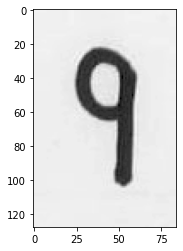

In [ ]:
imagenes_dataset = []
etiquetas_dataset = []
i=0
h=0
while(i<350):
  file = '/content/'+str(i)+'.png' 
  test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE )

  img_resized = cv2.resize(test_image, (28,28), )
  img_resized = cv2.bitwise_not(img_resized)

  if(h==9):
    imagenes_dataset.append(img_resized)
    etiquetas_dataset.append(h)
    h=0
  else:
    imagenes_dataset.append(img_resized)
    etiquetas_dataset.append(h)
    h=h+1
  i=i+1

  plt.imshow(test_image, cmap='gray')
#remplazar en train
newimagenes=np.array(imagenes_dataset)
newetiquetas=np.array(etiquetas_dataset)

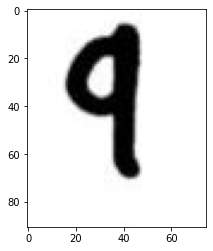

In [57]:
imagenes_test = []
etiquetas_test = []
i=350
h=0
while(i<500):
  file = '/content/sample_data/'+str(i)+'.png' 
  test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE )

  img_resized = cv2.resize(test_image, (28,28), )
  img_resized = cv2.bitwise_not(img_resized)

  if(h==9):
    imagenes_test.append(img_resized)
    etiquetas_test.append(h)
    h=0
  else:
    imagenes_test.append(img_resized)
    etiquetas_test.append(h)
    h=h+1
  i=i+1

  plt.imshow(test_image, cmap='gray')
  #test
newimagenes_test=np.array(imagenes_test)
newetiquetas_test=np.array(etiquetas_test)

In [54]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

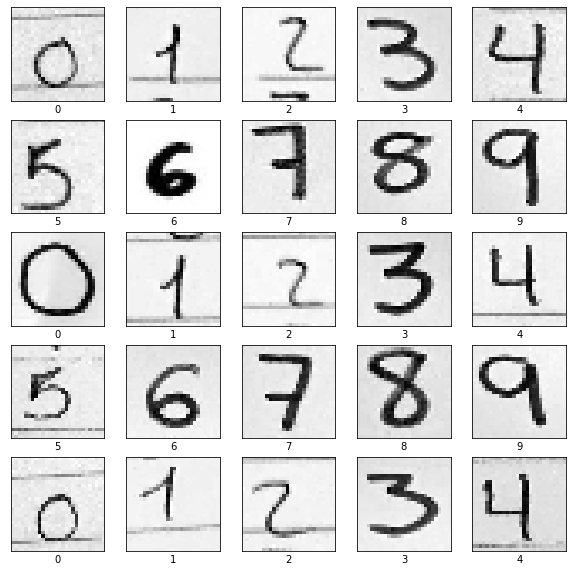

In [55]:
i=0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagenes_dataset[i], cmap=plt.cm.binary)
    plt.xlabel(etiquetas_dataset[i])
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
newimagenes.shape

(350, 28, 28)

In [ ]:
newetiquetas.shape

(350,)

In [ ]:
model.fit(newimagenes, newetiquetas, epochs=10)

Epoch 1/10
11/11 [==============================] - 0s 2ms/step - loss: 164.0096 - accuracy: 0.1400
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 60.7222 - accuracy: 0.1571
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 38.0427 - accuracy: 0.2257
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 25.3545 - accuracy: 0.2829
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 21.0303 - accuracy: 0.3200
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 12.9784 - accuracy: 0.3886
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 11.2764 - accuracy: 0.4143
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 11.9563 - accuracy: 0.4000
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 9.6987 - accuracy: 0.4343
Epoch 10/10
11/11 [==============================] - 0s 2ms/step - loss: 9.8227 - accuracy: 0.4657


In [ ]:
test_loss, test_acc = model.evaluate(newimagenes_test,  newetiquetas_test, verbose=2)

print('\nTest accuracy:', test_acc)

5/5 - 0s - loss: 46.0136 - accuracy: 0.2067 - 107ms/epoch - 21ms/step

Test accuracy: 0.20666666328907013


In [ ]:
predictions = model.predict(newimagenes_test)

5/5 [==============================] - 0s 2ms/step


In [ ]:
predictions[0]

array([9.9999994e-01, 0.0000000e+00, 3.6960601e-20, 3.8073080e-21,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.2376375e-28, 0.0000000e+00], dtype=float32)

In [ ]:
np.argmax(predictions[0])

0

In [ ]:
newetiquetas_test[0]

0

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

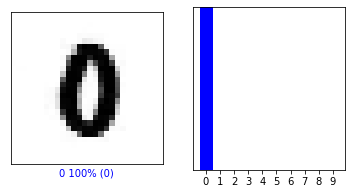

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], newetiquetas_test, newimagenes_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  newetiquetas_test)
plt.show()

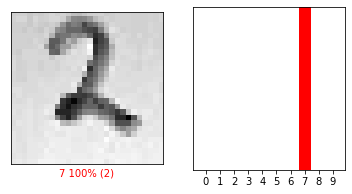

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], newetiquetas_test, newimagenes_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  newetiquetas_test)
plt.show()

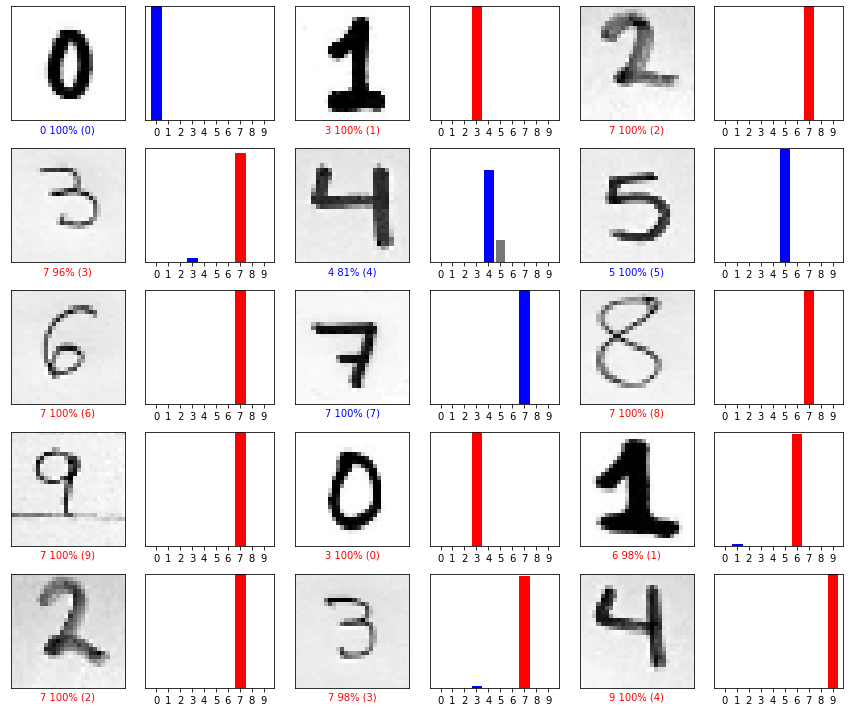

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], newetiquetas_test, newimagenes_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], newetiquetas_test)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = newimagenes_test[1]

print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 11ms/step
[[5.4318693e-35 1.5885553e-06 2.7359100e-08 9.9999845e-01 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


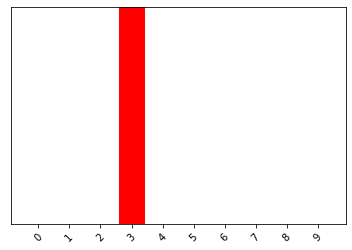

In [ ]:
plot_value_array(1, predictions_single[0], newetiquetas_test)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

3